# 1.) Absolute Links WebCrawl : 
## Our Goal is to expand on what we did last class. Grab data from all the webpages, not just one.

In [1]:
# Import Packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# We talk about user agents later so run and ignore
user_agent_list = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246" 
,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36 "
,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "
,"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1" 
,"Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"] 

headers = {
    'User-Agent': user_agent_list[3]}

In [2]:
# USE THE FUNCTION BUILT LAST CLASS TO PULL FROM ANY URL
def get_prices(URL):
    user_agent_list = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246" 
    ,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36 "
    ,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "
    ,"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1" 
    ,"Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"] 

    headers = {
        'User-Agent': user_agent_list[2]}
    
    # URL = "https://www.apartments.com/los-angeles-ca/"

    page = requests.get(URL, headers = headers)
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    price_elements = soup.findAll("p", class_ = "property-pricing")
    
    clean_p = [i.text for i in price_elements]
    
    lows = []
    highs = []

    for i in clean_p:
        try:
            lows.append(float(i.split("-")[0].replace("$", "").replace(",", "")))
        except:
             lows.append(np.nan)

        try:
            highs.append(float(i.split("-")[1].replace("$", "").replace(",", "")))
        except:
             highs.append(np.nan)
                
    return(lows, highs)

In [3]:
lows, highs = get_prices("https://www.apartments.com/los-angeles-ca/")

In [11]:
#lows

# Now find a pattern for the URLs of apartment.com for different pages.

In [4]:
import time
import random

In [5]:
# https://www.apartments.com/los-angeles-ca/
# https://www.apartments.com/los-angeles-ca/2/
# https://www.apartments.com/los-angeles-ca/3/

In [6]:
for page_number in range(2,10):
    URL = f"https://www.apartments.com/los-angeles-ca/{page_number}/"
    print(URL)
    temp_lows, temp_highs = get_prices(URL)
    lows = lows + temp_lows
    highs = highs + temp_highs
    time.sleep(random.randint(2,10))

https://www.apartments.com/los-angeles-ca/2/
https://www.apartments.com/los-angeles-ca/3/
https://www.apartments.com/los-angeles-ca/4/
https://www.apartments.com/los-angeles-ca/5/
https://www.apartments.com/los-angeles-ca/6/
https://www.apartments.com/los-angeles-ca/7/
https://www.apartments.com/los-angeles-ca/8/
https://www.apartments.com/los-angeles-ca/9/


In [22]:
max(highs)

52345.0

In [19]:
# Some Visualizations

In [7]:
import matplotlib.pyplot as plt

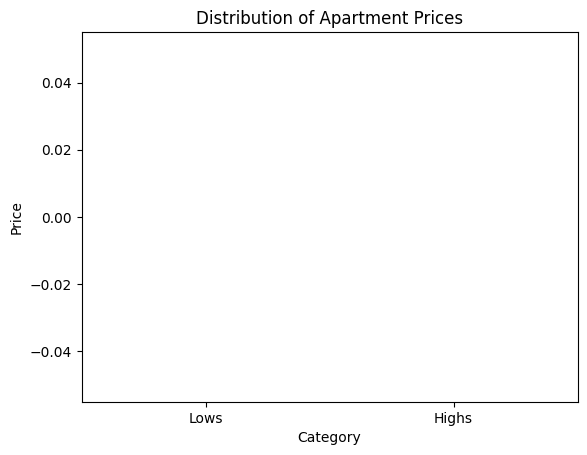

In [31]:
data = [lows, highs]
#data = list(zip(lows, highs))

%matplotlib inline
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Lows', 'Highs'])
ax.set_title('Distribution of Apartment Prices')
ax.set_ylabel('Price')
ax.set_xlabel('Category')
#min_value = 900
#max_value = 53000
#plt.ylim(min_value, max_value)
plt.show()


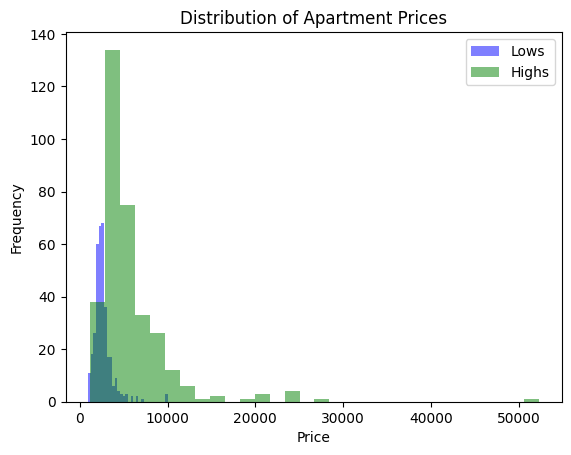

In [15]:
plt.figure()
plt.hist(lows, bins=30, alpha=0.5, color='blue', label='Lows')
plt.hist(highs, bins=30, alpha=0.5, color='green', label='Highs')
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# 2.) Relative Reference Webcrawl : Webscrape all Fed Survey CSVs

In [32]:
def lovely_soup(u):
    page = requests.get(u)
    return(BeautifulSoup(page.content, 'html.parser'))

In [33]:
url = "https://www.dallasfed.org/research/econdata#top"
base_url = "https://www.dallasfed.org"
soup = lovely_soup(url)

In [34]:
soup.findAll("a", href = True)[:3]

[<a href="#content">Skip to main content</a>,
 <a href="/news">News and Events</a>,
 <a href="/careers">Careers</a>]

In [35]:
# Step 1: Get all Survey URLS
url_list = []

for a in soup.findAll("a", href = True):
    if a.text[-6:] == "Survey":
        url_list.append(base_url+a["href"])

In [39]:
#Step 2: Get Excel links for 1 page
url = url_list[4]


soup = lovely_soup(url)
for a in soup.findAll("a", href = True):
    #print(a["href"])
    if (a["href"][-4:] == ".xls") | (a["href"][-5:] == ".xlsx"):
        print(a)



<a href="/~/media/Documents/research/surveys/tmos/documents/index.xls"><strong>Unadjusted</strong> </a>
<a href="/~/media/Documents/research/surveys/tmos/documents/index_sa.xls"><strong>Seasonally adjusted</strong> </a>
<a href="/~/media/Documents/research/surveys/tmos/documents/alldata.xls"><strong>Unadjusted</strong> </a>
<a href="/~/media/Documents/research/surveys/tmos/documents/alldata_sa.xls"><strong>Seasonally adjusted</strong> </a>


In [37]:
# Step 3 : Get Excel Links for all pages
xl_links = []

In [40]:
for url in url_list:
    soup = lovely_soup(url)
    time.sleep(random.randint(20,50))
    for a in soup.findAll("a", href = True):
        #print(a["href"])
        if (a["href"][-4:] == ".xls") | (a["href"][-5:] == ".xlsx"):
            xl_links.append(base_url + a["href"])
        

ConnectionError: HTTPSConnectionPool(host='www.dallasfed.orghttps', port=443): Max retries exceeded with url: //www.dallasfed.org/research/surveys/des (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000268A7FCD760>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [41]:
pd.read_excel("https://www.dallasfed.org/~/media/Documents/research/surveys/tmos/documents/index.xls")

,Date,Prod,Fprod,Capu,Fcapu,Vnwo,Fvnwo,Gro,Fgro,Ufil,...,Fnemp,Avgwk,Favgwk,Cexp,Fcexp,Colk,Fcolk,Bact,Fbact,Uncr
0,Jun-04,38.0,50.0,30.4,51.3,26.6,44.8,12.6,42.1,9.1,...,32.9,24.0,21.1,32.9,44.0,48.1,50.0,48.7,49.3,NaN
1,Jul-04,27.5,65.2,24.6,56.1,18.9,55.2,-1.4,46.2,0.0,...,36.4,12.8,10.6,24.6,41.8,35.7,50.7,34.3,37.3,NaN
2,Aug-04,29.6,58.6,25.3,48.6,22.5,52.9,11.3,47.1,-1.5,...,34.3,22.6,14.3,33.8,40.0,30.9,50.0,32.8,45.7,NaN
3,Sep-04,20.6,67.6,8.2,65.7,17.8,60.6,9.6,50.7,-1.4,...,33.8,6.8,16.9,26.4,37.1,23.3,46.5,23.3,42.0,NaN
4,Oct-04,18.1,58.5,13.6,53.9,13.7,56.9,7.6,44.6,10.8,...,29.2,6.1,18.8,18.2,49.2,22.7,50.0,18.1,42.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Nov-23,-15.2,16.1,-17.4,13.8,-27.2,10.4,-31.1,6.9,-21.7,...,15.1,-8.7,-1.1,2.2,15.5,-18.4,-7.0,-26.4,-14.3,20.3
234,Dec-23,-11.7,20.0,-10.7,21.4,-22.3,23.3,-28.7,12.2,-14.0,...,11.1,-3.2,7.8,0.0,13.8,-9.6,6.9,-11.8,-4.6,18.3
235,Jan-24,-11.9,28.7,-13.0,21.8,-9.8,25.6,-9.8,18.9,-10.9,...,18.4,-13.0,2.3,2.2,10.6,-15.2,8.1,-22.8,-3.6,20.9
236,Feb-24,4.4,32.9,1.1,31.4,8.6,34.0,-1.1,26.5,-8.8,...,21.6,-6.5,9.1,5.6,22.3,-2.2,18.4,-8.9,12.1,11.0


# 3.) Read online Tables


### Example 1.) Wikipedia

In [42]:
# Example 1 : 
URL = "https://en.wikipedia.org/wiki/Companies_listed_on_the_New_York_Stock_Exchange_(A)"
html = requests.get(URL).content
df_list = pd.read_html(html)

In [43]:
df_list[0]

,Stock name,Symbol,Country of origin
0,A. O. Smith Corporation,AOS,US
1,"A10 Networks, Inc.",ATEN,US
2,AAC Holdings Inc.,AAC,US
3,AAR Corporation,AIR,US
4,Aaron's Inc.,AAN,US
...,...,...,...
291,Axis Capital Holdings Limited,AXS.PRD,Bermuda
292,Axis Capital Holdings Limited,AXS.PRE,Bermuda
293,Axovant Sciences Ltd.,AXON,Bermuda
294,Azure Power Global Ltd.,AZRE,India


### Example 2 : Top end sports

In [44]:
# Example 2 : 
URL = "https://www.topendsports.com/events/calendar-2023.htm"
html = requests.get(URL).content
df_list = pd.read_html(html)

In [45]:
df_list = pd.read_html(requests.get("https://www.topendsports.com/events/calendar-2023.htm").content)


In [46]:
df_list[0]

,Date(s),Sport,Event,Location
0,Jan 16-29,Tennis,Australian Open,"Melbourne, Australia"
1,Jan 12-22,Multi-sports,Winter World University Games,"Lake Placid, USA"
2,Jan 12–29,Handball,World Championships (men),Poland and Sweden
3,Jan 13-29,Field Hockey,Men's Hockey World Cup,"Bhubaneswar & Rourkela, India"
4,Jan 21-27 (postponed from 2021 & 2022),Multi-sports,Special Olympics World Winter Games,"Kazan, Russia"
...,...,...,...,...
77,NaN,NaN,NaN,NaN
78,Nov 3-11 (postponed from 2022),Multi-sports,Gay Games,"Hong Kong, China"
79,Nov 7,Horse Racing,Melbourne Cup,"Victoria, Australia"
80,Nov 19 - Dec 1,Multi-sports,Pacific Games,"Honiara, Solomon Islands"
